In [32]:
import numpy as np
from astropy.io import fits
from astropy import units as U
from astropy import constants as Const
from astropy.cosmology import WMAP7
from pydl.pydlutils.spheregroup import spherematch
# -- iQuench -- 
from letstalkaboutquench import util as UT

read in Jeremy's catalog

In [2]:
tinker_ra, tinker_dec = np.loadtxt(''.join([UT.dat_dir(), 'central_positions_tinker_SDSS.dat']), 
                                   skiprows=2, unpack=True, usecols=[0,1])

In [3]:
tinker = np.loadtxt(''.join([UT.dat_dir(), 'tinker_SDSS_centrals_M9.7.dat']))

In [4]:
tinker_cz = np.loadtxt(''.join([UT.dat_dir(), 'tinker_SDSS_centrals_M9.7_pos.dat']), 
                       skiprows=2, unpack=True, usecols=[18])

In [5]:
tinker_z = tinker_cz / 299792.

Text(0,0.5,'Dec')

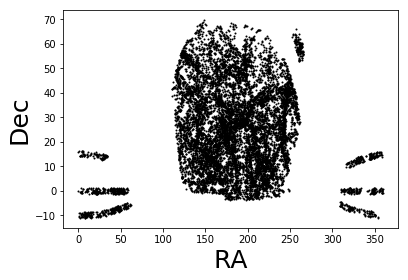

In [6]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

Read in NSA catalog

In [7]:
nsa = fits.open(''.join([UT.dat_dir(), 'nsa_v0_1_2.fits']))
nsa_data = nsa[1].data

In [8]:
print('NSA catalog has %i galaxies' % len(nsa_data.field('ra')))

NSA catalog has 145155 galaxies


Text(0,0.5,'Dec')

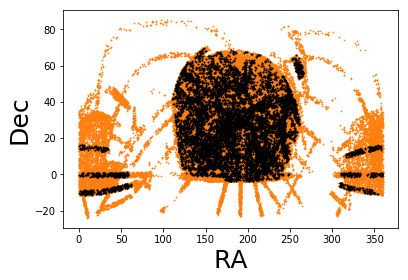

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=0.5, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

(10.0, 12.0)

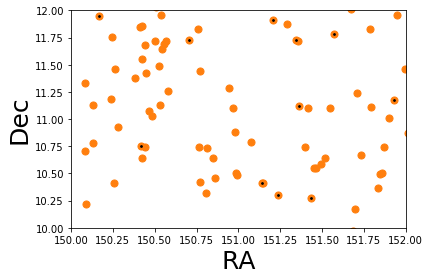

In [10]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=50, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=3, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([150, 152])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([10., 12.])

christ jeremy, you put one decimal place for the $RA$ and $Dec$

(array([ 3.97974949,  5.06676599,  6.24482702, 11.60541853, 19.56491751,
        22.07278044, 25.3903879 , 23.88125586, 25.1917453 , 26.98642609,
        29.974342  ,  0.04138388,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 <a list of 20 Patch objects>)

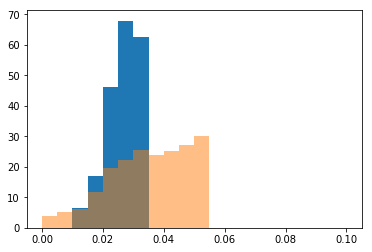

In [11]:
plt.hist(tinker_z, range=(0., 0.1), bins=20, density=True)
plt.hist(nsa_data.field('z'), range=(0., 0.1), bins=20, density=True, alpha=0.5)

In [12]:
match_length = (3 * U.arcsec).to(U.degree)
print('match length = %f degrees'% match_length.value)

match length = 0.000833 degrees


In [13]:
# now lets spherematch the two
m_nsa, m_tinker, dmatch = spherematch(nsa_data.field('ra'), nsa_data.field('dec'), tinker_ra, tinker_dec, 
                                      match_length.value, maxmatch=0)

In [14]:
dz = [] 
for m_tink in np.unique(m_tinker):
    tinktink = (m_tinker == m_tink) 
    if np.sum(tinktink) > 1: raise ValueError

    dz.append(tinker_z[m_tink]-nsa_data.field('z')[m_nsa[tinktink]])

In [15]:
dz = np.array(dz)

Text(0.5,0,'$z_\\mathrm{tinker} - z_\\mathrm{NSA}$')

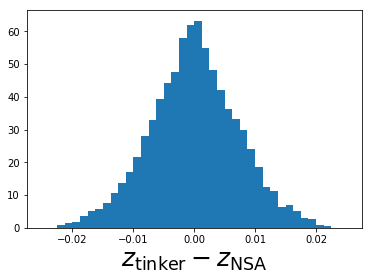

In [16]:
plt.hist(dz, range=(-0.025, 0.025), bins=40, density=True)
plt.xlabel("$z_\mathrm{tinker} - z_\mathrm{NSA}$", fontsize=25)

In [17]:
i_nsa = np.zeros(len(tinker_ra)).astype(int)
for i_tink in range(len(tinker_ra)):
    tinktink = (m_tinker == i_tink) 
    if np.sum(tinktink) > 1: 
        raise ValueError
    elif np.sum(tinktink) == 0: 
        i_nsa[i_tink] = -999
    else: 
        i_nsa[i_tink] = m_nsa[tinktink]

In [18]:
print i_nsa

[ 59329  23961  23831 ...  72288 103238  94180]


calculate Halpha and UV SFRs

In [19]:
nsa_data.names

['IAUNAME',
 'SUBDIR',
 'RA',
 'DEC',
 'ISDSS',
 'INED',
 'ISIXDF',
 'IALFALFA',
 'IZCAT',
 'ITWODF',
 'MAG',
 'Z',
 'ZSRC',
 'SIZE',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'XPOS',
 'YPOS',
 'ZLG',
 'ZDIST',
 'ZDIST_ERR',
 'NSAID',
 'NMGY',
 'NMGY_IVAR',
 'OK',
 'RNMGY',
 'ABSMAG',
 'AMIVAR',
 'EXTINCTION',
 'KCORRECT',
 'KCOEFF',
 'MTOL',
 'B300',
 'B1000',
 'METS',
 'MASS',
 'XCEN',
 'YCEN',
 'NPROF',
 'PROFMEAN',
 'PROFMEAN_IVAR',
 'QSTOKES',
 'USTOKES',
 'BASTOKES',
 'PHISTOKES',
 'PETROFLUX',
 'PETROFLUX_IVAR',
 'FIBERFLUX',
 'FIBERFLUX_IVAR',
 'BA50',
 'PHI50',
 'BA90',
 'PHI90',
 'SERSICFLUX',
 'SERSICFLUX_IVAR',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'ASYMMETRY',
 'CLUMPY',
 'DFLAGS',
 'AID',
 'PID',
 'DVERSION',
 'PROFTHETA',
 'PETROTHETA',
 'PETROTH50',
 'PETROTH90',
 'SERSIC_TH50',
 'OBJNO',
 'PLATE',
 'FIBERID',
 'MJD',
 'COEFF',
 'VDISP',
 'D4000',
 'D4000ERR',
 'FA',
 'FAERR',
 'S2FLUX',
 'S2FLUXERR',
 'S2EW',
 'S2EWERR',
 'S2VMEAS',
 'S2VMERR',
 'S2RATIO',
 'HAFLUX'

In [20]:
# some useful functions
def jansky(flux,kcorrect):
    '''Getting fluxes in Janskies from Nanomaggies:
    Inputs: Choose Petrosian/Sersic Nmgy and the relevant Kcorrection
    '''
    flux_in_Jy = flux*3631*(10.0**(-9.0))*(10**(kcorrect/(-2.5)))
    return flux_in_Jy


def UVsfr(z,fmag,nmag,rmag,f_flux):
    ''' Calculate UV star formation rates. 
    Inputs: NSAID, z, F-band magnitude, N-band magnitude, r-band magnitude, F-band flux in Janskies
    '''
    fn = fmag - nmag
    opt = nmag - rmag   # N-r
    
    #Luminosity Distance
    dist = WMAP7.comoving_distance(z)
    ldist = (1+z)*dist.value
    
    #calculating Attenuation 'atten'
    atten = np.repeat(-999., len(fmag)) 

    case1 = np.where((opt > 4.) & (fn < 0.95))
    atten[case1] = 3.32*fn[case1] + 0.22
    case2 = np.where((opt > 4.) & (fn >= 0.95))
    atten[case2] = 3.37
    case3 = np.where((opt <= 4.) & (fn < 0.9))
    atten[case3] = 2.99*fn[case3] + 0.27
    case4 = np.where((opt <= 4.) & (fn >= 0.9))
    atten[case4] = 2.96

    #if opt >= 4.0:
    #    if fn < 0.95:
    #        atten = 3.32*fn + 0.22
    #    else:
    #        atten = 3.37
    #else:
    #    if fn < 0.90:
    #        atten = 2.99*fn +0.27
    #    else:
    #        atten = 2.96

    lum = 4.*np.pi*(ldist**2.0)*(3.087**2.0)*(10**(25.0 +(atten/2.5)))*f_flux  #Luminosity
    sfr = 1.08*(10**(-28.0))*np.abs(lum)
    return sfr

In [21]:
nsa_fuv = nsa_data.field('NMGY')[:,0] # nanomaggies
nsa_fuv_kcorr = nsa_data.field('KCORRECT')[:,0] # kcorrect
nsa_fuv_jansky = jansky(nsa_fuv, nsa_fuv_kcorr)

nsa_uv_sfr = UVsfr(nsa_data.field('z'), 
                   nsa_data.field('ABSMAG')[:,0], 
                   nsa_data.field('ABSMAG')[:,1], 
                   nsa_data.field('ABSMAG')[:,4], 
                   nsa_fuv_jansky)

In [23]:
nsa_uv_sfr.min(), nsa_uv_sfr.max()

(0.0, 38329771.52475595)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-4.0, 4.0)

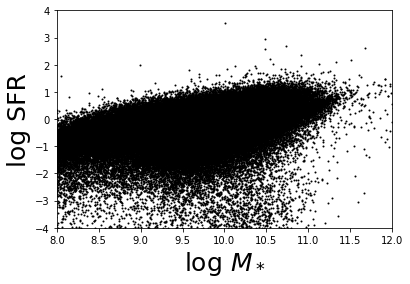

In [28]:
fig = plt.figure() 
sub = fig.add_subplot(111)
sub.scatter(np.log10(nsa_data.field('MASS')), np.log10(nsa_uv_sfr), c='k', s=1)
sub.set_xlabel('log $M_*$', fontsize=25)
sub.set_xlim([8., 12.])
sub.set_ylabel('log SFR', fontsize=25)
sub.set_ylim([-4., 4.])

In [52]:
ha_flux = nsa_data.field('HAFLUX') * 1e-17 * U.erg/U.s/U.cm**2

In [53]:
H0 = 70. * U.km/U.s/U.Mpc

In [54]:
ha_flux *= 4. * np.pi * (nsa_data.field('ZDIST') * Const.c / H0)**2

In [55]:
ha_flux

<Quantity [5.7664316e-04, 9.8737597e-04, 1.4983922e-05, ..., 0.0000000e+00,
           0.0000000e+00, 0.0000000e+00] erg m2 Mpc2 / (cm2 km2 s)>

In [60]:
HA_SFR = ha_flux.to(U.erg/U.s) /(10.**41.28)

In [63]:
np.log10(HA_SFR.value)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([-1.54039177, -1.30681636, -3.12567342, ...,        -inf,
              -inf,        -inf])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-4.0, 4.0)

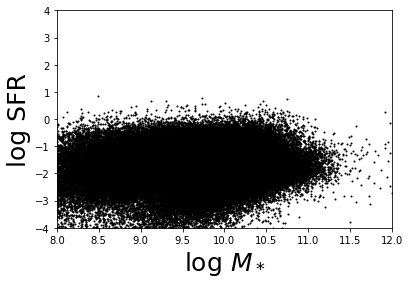

In [64]:
fig = plt.figure() 
sub = fig.add_subplot(111)
sub.scatter(np.log10(nsa_data.field('MASS')), np.log10(HA_SFR.value), c='k', s=1)
sub.set_xlabel('log $M_*$', fontsize=25)
sub.set_xlim([8., 12.])
sub.set_ylabel('log SFR', fontsize=25)
sub.set_ylim([-4., 4.])